# **Lab 6**

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._assign_value()

    def _assign_value(self):
   
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11  
        else:
            return int(self.rank)

    def __str__(self):
        return f"{self.rank} of {self.suit}"

    def __repr__(self):
        return self.__str__()


class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = None
        self._initialize_deck()

    def _initialize_deck(self):
        """Creates and shuffles a deck of num_decks * 52 cards."""
        # Clear any existing cards
        self.cards = []
        # Create multiple 52-card decks
        for _ in range(self.num_decks):
            for suit in Deck.suits:
                for rank in Deck.ranks:
                    self.cards.append(Card(suit, rank))
        self.shuffle()
        self._place_plastic_card()

    def shuffle(self):
        """Shuffles the deck of cards."""
        random.shuffle(self.cards)

    def _place_plastic_card(self):
        """Places a plastic card randomly within the deck."""
        self.plastic_card_position = random.randint(int(0.75 * len(self.cards)), len(self.cards) - 1)

    def draw_card(self):
        """Draws a card from the deck. If plastic card is drawn, reshuffle deck."""
        if len(self.cards) == 0:
            self._initialize_deck()  
        card = self.cards.pop(0)
    
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached! Reshuffling deck...")
            self._initialize_deck()
        return card

    def __len__(self):
        return len(self.cards)


deck = Deck(num_decks=6)
print("Initial deck size:", len(deck))
print("Drawing 5 cards:")

for _ in range(5):
    print(deck.draw_card())

print("Deck size after drawing 5 cards:", len(deck))


Initial deck size: 312
Drawing 5 cards:
10 of Spades
K of Clubs
6 of Spades
Q of Spades
5 of Hearts
Deck size after drawing 5 cards: 307


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

In [11]:
pip install graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import graphviz

dot = graphviz.Digraph()


dot.node('Player', 'Player\n- name: str\n- hand: Hand\n\n+ add_card(card: Card)\n+ play_card(card: Card)')

dot.node('Hand', 'Hand\n- cards: List[Card]\n\n+ add_card(card: Card)\n+ remove_card(card: Card)\n+ get_cards(): List[Card]')

dot.node('Game', 'Game\n- players: List[Player]\n- deck: List[Card]\n\n+ start_game()\n+ play_turn(player: Player)\n+ check_winner()')

dot.edge('Game', 'Player', label='has')
dot.edge('Player', 'Hand', label='has')
dot.edge('Game', 'Hand', label='manages')

dot.render('card_game_uml_diagram', format='pdf', cleanup=True)

dot.view()


'card_game_uml_diagram.pdf'

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [2]:
class Card:
    def __init__(self, suit: str, rank: str):
        self.suit = suit  
        self.rank = rank  

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    def __init__(self):
        self.cards = []  

    def add_card(self, card: Card) -> None:
        """Adds a card to the hand."""
        self.cards.append(card)

    def remove_card(self, card: Card) -> None:
        """Removes a card from the hand."""
        self.cards.remove(card)

    def get_cards(self) -> list:
        """Returns the list of cards in the hand."""
        return self.cards


class Player:
    def __init__(self, name: str):
        self.name = name  
        self.hand = Hand()  

    def add_card(self, card: Card) -> None:
        """Adds a card to the player's hand."""
        self.hand.add_card(card)

    def play_card(self, card: Card) -> None:
        """Plays a card from the player's hand."""
        self.hand.remove_card(card)

    def __str__(self):
        return f"Player: {self.name}, Hand: {[str(card) for card in self.hand.get_cards()]}"


class Game:
    def __init__(self):
        self.players = []  
        self.deck = []  

    def start_game(self) -> None:
        """Initializes the game, shuffles deck, and deals cards."""
        pass

    def play_turn(self, player: Player) -> None:
        """Allows a player to take their turn."""
        pass

    def check_winner(self) -> Player:
        """Determines if there is a winner and returns the Player instance."""
        pass


if __name__ == "__main__":

    card1 = Card('Hearts', '10')
    card2 = Card('Diamonds', 'Ace')

    player = Player('Alice')
    
    player.add_card(card1)
    player.add_card(card2)

    print(player)  


Player: Alice, Hand: ['10 of Hearts', 'Ace of Diamonds']


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [3]:
import random

class Card:
    def __init__(self, suit: str, rank: str):
        self.suit = suit  
        self.rank = rank  

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    def __init__(self):
        self.cards = []  

    def add_card(self, card: Card) -> None:
        """Adds a card to the hand."""
        self.cards.append(card)

    def remove_card(self, card: Card) -> None:
        """Removes a card from the hand."""
        self.cards.remove(card)

    def get_cards(self) -> list:
        """Returns the list of cards in the hand."""
        return self.cards

    def clear(self) -> None:
        """Clears the hand of all cards."""
        self.cards.clear()


class Player:
    def __init__(self, name: str):
        self.name = name  # The name of the player
        self.hand = Hand()  # Instance of Hand class

    def add_card(self, card: Card) -> None:
        """Adds a card to the player's hand."""
        self.hand.add_card(card)

    def play_card(self, card: Card) -> None:
        """Plays a card from the player's hand."""
        self.hand.remove_card(card)

    def __str__(self):
        return f"{self.name}: {', '.join(str(card) for card in self.hand.get_cards())}"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")  

    def shuffle_deck(self, deck: list) -> None:
        """Shuffles the deck."""
        random.shuffle(deck)

    def deal_card(self, deck: list) -> Card:
        """Deals a card from the deck."""
        return deck.pop() if deck else None


class HumanPlayer(Player):
    def __init__(self, name: str):
        super().__init__(name)

    def choose_card(self) -> Card:
        """Let the human player choose a card to play. Placeholder for future implementation."""

        if self.hand.get_cards():
            return self.hand.get_cards()[0]  
        return None


class Game:
    def __init__(self):
        self.deck = self.create_deck()  
        self.dealer = Dealer()  
        self.human_player = HumanPlayer("Alice")  
        self.start_game()

    def create_deck(self) -> list:
        """Creates a standard deck of 52 cards."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return [Card(suit, rank) for suit in suits for rank in ranks]

    def start_game(self) -> None:
        """Initializes the game, shuffles deck, and deals cards."""
        self.dealer.shuffle_deck(self.deck)
        for _ in range(2):  # Deal two cards to each player
            self.human_player.add_card(self.dealer.deal_card(self.deck))
            self.dealer.add_card(self.dealer.deal_card(self.deck))

    def play_turn(self, player: Player) -> None:
        """Allows a player to take their turn."""
        if isinstance(player, HumanPlayer):
            print(f"{player.name}'s turn:")
            card_to_play = player.choose_card()
            if card_to_play:
                player.play_card(card_to_play)
                print(f"{player.name} played: {card_to_play}")
            else:
                print(f"{player.name} has no cards to play.")
        else:
 
            if self.dealer.hand.get_cards():
                card_to_play = self.dealer.hand.get_cards()[0]  
                self.dealer.play_card(card_to_play)
                print(f"{self.dealer.name} played: {card_to_play}")

    def check_winner(self) -> str:
        """Determines if there is a winner based on the number of cards left."""
        if not self.human_player.hand.get_cards() and not self.dealer.hand.get_cards():
            return "It's a tie!"
        elif not self.human_player.hand.get_cards():
            return f"{self.dealer.name} wins!"
        elif not self.dealer.hand.get_cards():
            return f"{self.human_player.name} wins!"
        return None


if __name__ == "__main__":
    game = Game()
    print(game.human_player)  
    print(game.dealer) 

    game.play_turn(game.human_player)
    game.play_turn(game.dealer)

    winner = game.check_winner()
    if winner:
        print(winner)


Alice: 7 of Clubs, Ace of Hearts
Dealer: 5 of Diamonds, 4 of Spades
Alice's turn:
Alice played: 7 of Clubs
Dealer played: 5 of Diamonds


5. Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [4]:
import random

class Card:
    def __init__(self, suit: str, rank: str):
        self.suit = suit  
        self.rank = rank  

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    def __init__(self):
        self.cards = []  

    def add_card(self, card: Card) -> None:
        """Adds a card to the hand."""
        self.cards.append(card)

    def remove_card(self, card: Card) -> None:
        """Removes a card from the hand."""
        self.cards.remove(card)

    def get_cards(self) -> list:
        """Returns the list of cards in the hand."""
        return self.cards

    def clear(self) -> None:
        """Clears the hand of all cards."""
        self.cards.clear()

    def has_cards(self) -> bool:
        """Checks if the hand has cards."""
        return len(self.cards) > 0


class Player:
    def __init__(self, name: str):
        self.name = name  
        self.hand = Hand()  

    def add_card(self, card: Card) -> None:
        """Adds a card to the player's hand."""
        self.hand.add_card(card)

    def play_card(self, card: Card) -> None:
        """Plays a card from the player's hand."""
        self.hand.remove_card(card)

    def __str__(self):
        return f"{self.name}: {', '.join(str(card) for card in self.hand.get_cards())}"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")  

    def shuffle_deck(self, deck: list) -> None:
        """Shuffles the deck."""
        random.shuffle(deck)

    def deal_card(self, deck: list) -> Card:
        """Deals a card from the deck."""
        return deck.pop() if deck else None


class HumanPlayer(Player):
    def __init__(self, name: str):
        super().__init__(name)

    def choose_card(self) -> Card:
        """Let the human player choose a card to play."""
        while True:
            print(f"{self.name}'s turn. Choose a card to play:")
            for i, card in enumerate(self.hand.get_cards()):
                print(f"{i + 1}: {card}")
            choice = input("Enter the card number: ")
            if choice.isdigit() and 1 <= int(choice) <= len(self.hand.get_cards()):
                return self.hand.get_cards()[int(choice) - 1]
            print("Invalid choice. Please try again.")


class Game:
    def __init__(self):
        self.deck = self.create_deck()  # Create a new deck of cards
        self.dealer = Dealer()  # Create a dealer
        self.human_player = HumanPlayer("Alice")  # Create a human player
        self.rounds = 5  # Number of rounds to play
        self.start_game()

    def create_deck(self) -> list:
        """Creates a standard deck of 52 cards."""
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return [Card(suit, rank) for suit in suits for rank in ranks]

    def start_game(self) -> None:
        """Initializes the game, shuffles deck, and deals cards."""
        self.dealer.shuffle_deck(self.deck)
        for _ in range(2):  # Deal two cards to each player
            self.human_player.add_card(self.dealer.deal_card(self.deck))
            self.dealer.add_card(self.dealer.deal_card(self.deck))

    def play_turn(self, player: Player) -> None:
        """Allows a player to take their turn."""
        if isinstance(player, HumanPlayer):
            card_to_play = player.choose_card()
            if card_to_play:
                player.play_card(card_to_play)
                print(f"{player.name} played: {card_to_play}")

    def dealer_turn(self):
        """Dealer plays their turn."""
        if self.dealer.hand.has_cards():
            card_to_play = self.dealer.hand.get_cards()[0]  # Dealer plays the first card for simplicity
            self.dealer.play_card(card_to_play)
            print(f"{self.dealer.name} played: {card_to_play}")

    def play_round(self) -> None:
        """Plays a single round of the game."""
        print("\n--- New Round ---")
        print(self.human_player)  # Show current hand of human player
        print(self.dealer)  # Show current hand of dealer
        self.play_turn(self.human_player)
        self.dealer_turn()

    def check_winner(self) -> str:
        """Checks for the winner based on remaining cards."""
        if not self.human_player.hand.has_cards() and not self.dealer.hand.has_cards():
            return "It's a tie!"
        elif not self.human_player.hand.has_cards():
            return f"{self.dealer.name} wins!"
        elif not self.dealer.hand.has_cards():
            return f"{self.human_player.name} wins!"
        return None

    def play_game(self) -> None:
        """Plays the full game for a set number of rounds."""
        for round_number in range(1, self.rounds + 1):
            print(f"\n--- Round {round_number} ---")
            self.play_round()
            winner = self.check_winner()
            if winner:
                print(winner)
                break

if __name__ == "__main__":
    game = Game()
    game.play_game()



--- Round 1 ---

--- New Round ---
Alice: 6 of Diamonds, Jack of Clubs
Dealer: Ace of Clubs, 9 of Diamonds
Alice's turn. Choose a card to play:
1: 6 of Diamonds
2: Jack of Clubs


Enter the card number:  2 of hearts


Invalid choice. Please try again.
Alice's turn. Choose a card to play:
1: 6 of Diamonds
2: Jack of Clubs


Enter the card number:  1


Alice played: 6 of Diamonds
Dealer played: Ace of Clubs

--- Round 2 ---

--- New Round ---
Alice: Jack of Clubs
Dealer: 9 of Diamonds
Alice's turn. Choose a card to play:
1: Jack of Clubs


Enter the card number:  1


Alice played: Jack of Clubs
Dealer played: 9 of Diamonds
It's a tie!


6. Implement a new player with the following strategy:
   * Assign each card a value:
     * Cards 2 to 6 are +1
     * Cards 7 to 9 are 0
     * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.

In [5]:


class Card:
    def __init__(self, suit: str, rank: str):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card: Card) -> None:
        self.cards.append(card)

    def remove_card(self, card: Card) -> None:
        self.cards.remove(card)

    def get_cards(self) -> list:
        return self.cards

    def clear(self) -> None:
        self.cards.clear()

    def has_cards(self) -> bool:
        return len(self.cards) > 0


class Player:
    def __init__(self, name: str):
        self.name = name
        self.hand = Hand()

    def add_card(self, card: Card) -> None:
        self.hand.add_card(card)

    def play_card(self, card: Card) -> None:
        self.hand.remove_card(card)

    def __str__(self):
        return f"{self.name}: {', '.join(str(card) for card in self.hand.get_cards())}"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")

    def shuffle_deck(self, deck: list) -> None:
        random.shuffle(deck)

    def deal_card(self, deck: list) -> Card:
        return deck.pop() if deck else None


class HumanPlayer(Player):
    def __init__(self, name: str):
        super().__init__(name)

    def choose_card(self) -> Card:
        while True:
            print(f"{self.name}'s turn. Choose a card to play:")
            for i, card in enumerate(self.hand.get_cards()):
                print(f"{i + 1}: {card}")
            choice = input("Enter the card number: ")
            if choice.isdigit() and 1 <= int(choice) <= len(self.hand.get_cards()):
                return self.hand.get_cards()[int(choice) - 1]
            print("Invalid choice. Please try again.")


class StrategicPlayer(Player):
    def __init__(self, name: str, threshold: int):
        super().__init__(name)
        self.threshold = threshold  # The threshold for hitting or staying
        self.card_value_sum = 0  # Total value of the cards seen so far

    def assign_card_value(self, card: Card) -> int:
        """Assigns a value to the card based on the defined strategy."""
        rank = card.rank
        if rank in ['2', '3', '4', '5', '6']:
            return 1
        elif rank in ['7', '8', '9']:
            return 0
        else:  # 10, Jack, Queen, King, Ace
            return -1

    def evaluate_hand(self) -> None:
        """Computes the sum of the card values for all cards seen so far."""
        for card in self.hand.get_cards():
            self.card_value_sum += self.assign_card_value(card)

    def decide(self) -> str:
        """Decides whether to hit or stay based on the card value sum."""
        self.evaluate_hand()
        print(f"{self.name} evaluates their hand: {self.card_value_sum}")
        if self.card_value_sum < self.threshold:
            return "hit"
        else:
            return "stay"


class Game:
    def __init__(self):
        self.deck = self.create_deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer("Alice")
        self.strategic_player = StrategicPlayer("Bob", -2)  # New strategic player
        self.rounds = 5
        self.start_game()

    def create_deck(self) -> list:
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return [Card(suit, rank) for suit in suits for rank in ranks]

    def start_game(self) -> None:
        self.dealer.shuffle_deck(self.deck)
        for _ in range(2):
            self.human_player.add_card(self.dealer.deal_card(self.deck))
            self.strategic_player.add_card(self.dealer.deal_card(self.deck))
            self.dealer.add_card(self.dealer.deal_card(self.deck))

    def play_turn(self, player: Player) -> None:
        if isinstance(player, HumanPlayer):
            card_to_play = player.choose_card()
            if card_to_play:
                player.play_card(card_to_play)
                print(f"{player.name} played: {card_to_play}")
        elif isinstance(player, StrategicPlayer):
            action = player.decide()
            if action == "hit":
                card_to_draw = self.dealer.deal_card(self.deck)
                if card_to_draw:
                    player.add_card(card_to_draw)
                    print(f"{player.name} drew: {card_to_draw}")
            else:
                print(f"{player.name} decided to stay.")

    def dealer_turn(self):
        if self.dealer.hand.has_cards():
            card_to_play = self.dealer.hand.get_cards()[0]
            self.dealer.play_card(card_to_play)
            print(f"{self.dealer.name} played: {card_to_play}")

    def play_round(self) -> None:
        print("\n--- New Round ---")
        print(self.human_player)
        print(self.strategic_player)
        print(self.dealer)
        self.play_turn(self.human_player)
        self.play_turn(self.strategic_player)
        self.dealer_turn()

    def check_winner(self) -> str:
        if not self.human_player.hand.has_cards() and not self.dealer.hand.has_cards():
            return "It's a tie!"
        elif not self.human_player.hand.has_cards():
            return f"{self.dealer.name} wins!"
        elif not self.dealer.hand.has_cards():
            return f"{self.human_player.name} wins!"
        return None

    def play_game(self) -> None:
        for round_number in range(1, self.rounds + 1):
            print(f"\n--- Round {round_number} ---")
            self.play_round()
            winner = self.check_winner()
            if winner:
                print(winner)
                break

if __name__ == "__main__":
    game = Game()
    game.play_game()



--- Round 1 ---

--- New Round ---
Alice: Queen of Diamonds, Queen of Spades
Bob: 4 of Diamonds, 3 of Diamonds
Dealer: King of Clubs, 6 of Clubs
Alice's turn. Choose a card to play:
1: Queen of Diamonds
2: Queen of Spades


Enter the card number:  1


Alice played: Queen of Diamonds
Bob evaluates their hand: 2
Bob decided to stay.
Dealer played: King of Clubs

--- Round 2 ---

--- New Round ---
Alice: Queen of Spades
Bob: 4 of Diamonds, 3 of Diamonds
Dealer: 6 of Clubs
Alice's turn. Choose a card to play:
1: Queen of Spades


Enter the card number:  1


Alice played: Queen of Spades
Bob evaluates their hand: 4
Bob decided to stay.
Dealer played: 6 of Clubs
It's a tie!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [ ]:


class Card:
    def __init__(self, suit: str, rank: str):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card: Card) -> None:
        self.cards.append(card)

    def remove_card(self, card: Card) -> None:
        self.cards.remove(card)

    def get_cards(self) -> list:
        return self.cards

    def clear(self) -> None:
        self.cards.clear()

    def has_cards(self) -> bool:
        return len(self.cards) > 0


class Player:
    def __init__(self, name: str, chips: int):
        self.name = name
        self.chips = chips  
        self.hand = Hand()

    def add_card(self, card: Card) -> None:
        self.hand.add_card(card)

    def play_card(self, card: Card) -> None:
        self.hand.remove_card(card)

    def __str__(self):
        return f"{self.name} (Chips: {self.chips}): {', '.join(str(card) for card in self.hand.get_cards())}"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", 0)

    def shuffle_deck(self, deck: list) -> None:
        random.shuffle(deck)

    def deal_card(self, deck: list) -> Card:
        return deck.pop() if deck else None


class HumanPlayer(Player):
    def __init__(self, name: str, chips: int):
        super().__init__(name, chips)

    def choose_card(self) -> Card:
        while True:
            print(f"{self.name}'s turn. Choose a card to play:")
            for i, card in enumerate(self.hand.get_cards()):
                print(f"{i + 1}: {card}")
            choice = input("Enter the card number: ")
            if choice.isdigit() and 1 <= int(choice) <= len(self.hand.get_cards()):
                return self.hand.get_cards()[int(choice) - 1]
            print("Invalid choice. Please try again.")


class StrategicPlayer(Player):
    def __init__(self, name: str, chips: int, threshold: int, verbose: bool = True):
        super().__init__(name, chips)
        self.threshold = threshold  
        self.card_value_sum = 0  
        self.verbose = verbose  

    def assign_card_value(self, card: Card) -> int:
        """Assigns a value to the card based on the defined strategy."""
        rank = card.rank
        if rank in ['2', '3', '4', '5', '6']:
            return 1
        elif rank in ['7', '8', '9']:
            return 0
        else:  
            return -1

    def evaluate_hand(self) -> None:
        """Computes the sum of the card values for all cards seen so far."""
        for card in self.hand.get_cards():
            self.card_value_sum += self.assign_card_value(card)

    def decide(self) -> str:
        """Decides whether to hit or stay based on the card value sum."""
        self.evaluate_hand()
        if self.verbose:
            print(f"{self.name} evaluates their hand: {self.card_value_sum}")
        return "hit" if self.card_value_sum < self.threshold else "stay"


class Game:
    def __init__(self, num_players: int, initial_chips: int, rounds: int, verbose: bool = True):
        self.deck = self.create_deck()
        self.dealer = Dealer()
        self.human_player = HumanPlayer("Alice", initial_chips)
        self.strategic_player = StrategicPlayer("Bob", initial_chips, -2, verbose)
        self.other_players = [Player(f"Player {i + 1}", initial_chips) for i in range(num_players)]
        self.rounds = rounds
        self.verbose = verbose
        self.start_game()

    def create_deck(self) -> list:
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        return [Card(suit, rank) for suit in suits for rank in ranks]

    def start_game(self) -> None:
        self.dealer.shuffle_deck(self.deck)
        for _ in range(2):
            self.human_player.add_card(self.dealer.deal_card(self.deck))
            self.strategic_player.add_card(self.dealer.deal_card(self.deck))
            for player in self.other_players:
                player.add_card(self.dealer.deal_card(self.deck))

    def play_turn(self, player: Player) -> None:
        if isinstance(player, HumanPlayer):
            card_to_play = player.choose_card()
            if card_to_play:
                player.play_card(card_to_play)
                if self.verbose:
                    print(f"{player.name} played: {card_to_play}")
        elif isinstance(player, StrategicPlayer):
            action = player.decide()
            if action == "hit":
                card_to_draw = self.dealer.deal_card(self.deck)
                if card_to_draw:
                    player.add_card(card_to_draw)
                    if self.verbose:
                        print(f"{player.name} drew: {card_to_draw}")
            else:
                if self.verbose:
                    print(f"{player.name} decided to stay.")
        else:  # For other players following the dealer's strategy
            card_to_play = player.hand.get_cards()[0]  
            player.play_card(card_to_play)
            if self.verbose:
                print(f"{player.name} played: {card_to_play}")

    def dealer_turn(self):
        if self.dealer.hand.has_cards():
            card_to_play = self.dealer.hand.get_cards()[0]  
            self.dealer.play_card(card_to_play)
            if self.verbose:
                print(f"{self.dealer.name} played: {card_to_play}")

    def play_round(self) -> None:
        if self.verbose:
            print("\n--- New Round ---")
            print(self.human_player)
            print(self.strategic_player)
            for player in self.other_players:
                print(player)


        self.play_turn(self.human_player)
        self.play_turn(self.strategic_player)
        for player in self.other_players:
            self.play_turn(player)
        self.dealer_turn()

    def check_winner(self) -> str:
        """Checks if any player is out of cards and determines the winner."""
        if not self.human_player.hand.has_cards() and not self.strategic_player.hand.has_cards():
            return "It's a tie!"
        elif not self.human_player.hand.has_cards():
            return f"{self.dealer.name} wins!"
        elif not self.strategic_player.hand.has_cards():
            return f"{self.human_player.name} wins!"
        return None

    def play_game(self) -> None:
        for round_number in range(1, self.rounds + 1):
            if self.strategic_player.chips <= 0:
                print(f"{self.strategic_player.name} is out of chips! Game over.")
                break
            print(f"\n--- Round {round_number} ---")
            self.play_round()
            winner = self.check_winner()
            if winner:
                print(winner)

if __name__ == "__main__":
    
    num_players = 3  
    initial_chips = 100  
    rounds = 50  

    game = Game(num_players, initial_chips, rounds, verbose=False)
    game.play_game()
    print(f"{game.strategic_player.name} has {game.strategic_player.chips} chips left.")

    



--- Round 1 ---
Alice's turn. Choose a card to play:
1: 9 of Clubs
2: 5 of Diamonds


Enter the card number:  2



--- Round 2 ---
Alice's turn. Choose a card to play:
1: 9 of Clubs


Enter the card number:  1


Dealer wins!

--- Round 3 ---
Alice's turn. Choose a card to play:


Enter the card number:  1: 9 of Clubs


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  1: 9 of Clubs 2: 5 of Diamonds


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  Queen of Spades


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  1: Queen of Spades


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  1


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  1 of hearts


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


Enter the card number:  9 of clubs


Invalid choice. Please try again.
Alice's turn. Choose a card to play:


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?

In [6]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 11.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Average winnings per game: 58.0
Standard deviation of winnings: 64.28063471995279
Probability of net winning after 50 rounds: 0.77
Probability of net losing after 50 rounds: 0.16


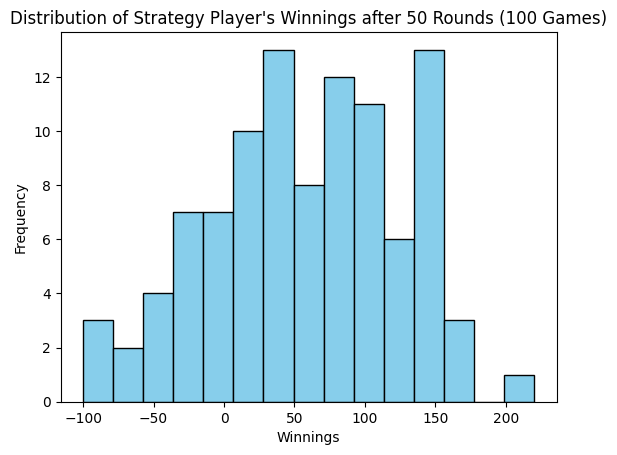

In [9]:

import matplotlib.pyplot as plt
import numpy as np

class Player:
    def __init__(self, chips, strategy="dealer"):
        self.chips = chips
        self.strategy = strategy

    def bet(self):
        return 10 if self.chips >= 10 else self.chips

    def play_turn(self):
        if self.strategy == "strategy_player":
            return random.choices([1, -1], weights=[55, 45], k=1)[0]  
        else:
            return random.choices([1, -1], weights=[50, 50], k=1)[0] 

def simulate_game(rounds=50, initial_chips=100):
    strategy_player = Player(chips=initial_chips, strategy="strategy_player")
    dealer = Player(chips=initial_chips)
    players = [strategy_player, dealer] + [Player(chips=initial_chips) for _ in range(2)]

    for _ in range(rounds):
        if strategy_player.chips <= 0:
            break
        for player in players:
            bet_amount = player.bet()
            result = player.play_turn()
            player.chips += bet_amount * result

    return strategy_player.chips - initial_chips

# Simulate 100 games
games = 100
rounds_per_game = 50
initial_chips = 100
winnings = [simulate_game(rounds=rounds_per_game, initial_chips=initial_chips) for _ in range(games)]


average_winnings = np.mean(winnings)
std_dev_winnings = np.std(winnings)
probability_winning = sum(1 for win in winnings if win > 0) / games
probability_losing = sum(1 for win in winnings if win < 0) / games

print(f"Average winnings per game: {average_winnings}")
print(f"Standard deviation of winnings: {std_dev_winnings}")
print(f"Probability of net winning after 50 rounds: {probability_winning}")
print(f"Probability of net losing after 50 rounds: {probability_losing}")

plt.hist(winnings, bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Winnings")
plt.ylabel("Frequency")
plt.title("Distribution of Strategy Player's Winnings after 50 Rounds (100 Games)")
plt.show()


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Threshold: 50%
  Average Winnings: 0.4
  Standard Deviation: 65.48160046913942
  Probability of Net Winning: 0.42

Threshold: 55%
  Average Winnings: 52.6
  Standard Deviation: 75.40053050211252
  Probability of Net Winning: 0.66

Threshold: 60%
  Average Winnings: 106.8
  Standard Deviation: 68.65682777408232
  Probability of Net Winning: 0.91

Threshold: 65%
  Average Winnings: 145.0
  Standard Deviation: 60.95079983068311
  Probability of Net Winning: 0.97

Threshold: 70%
  Average Winnings: 198.2
  Standard Deviation: 68.8241236776757
  Probability of Net Winning: 1.0



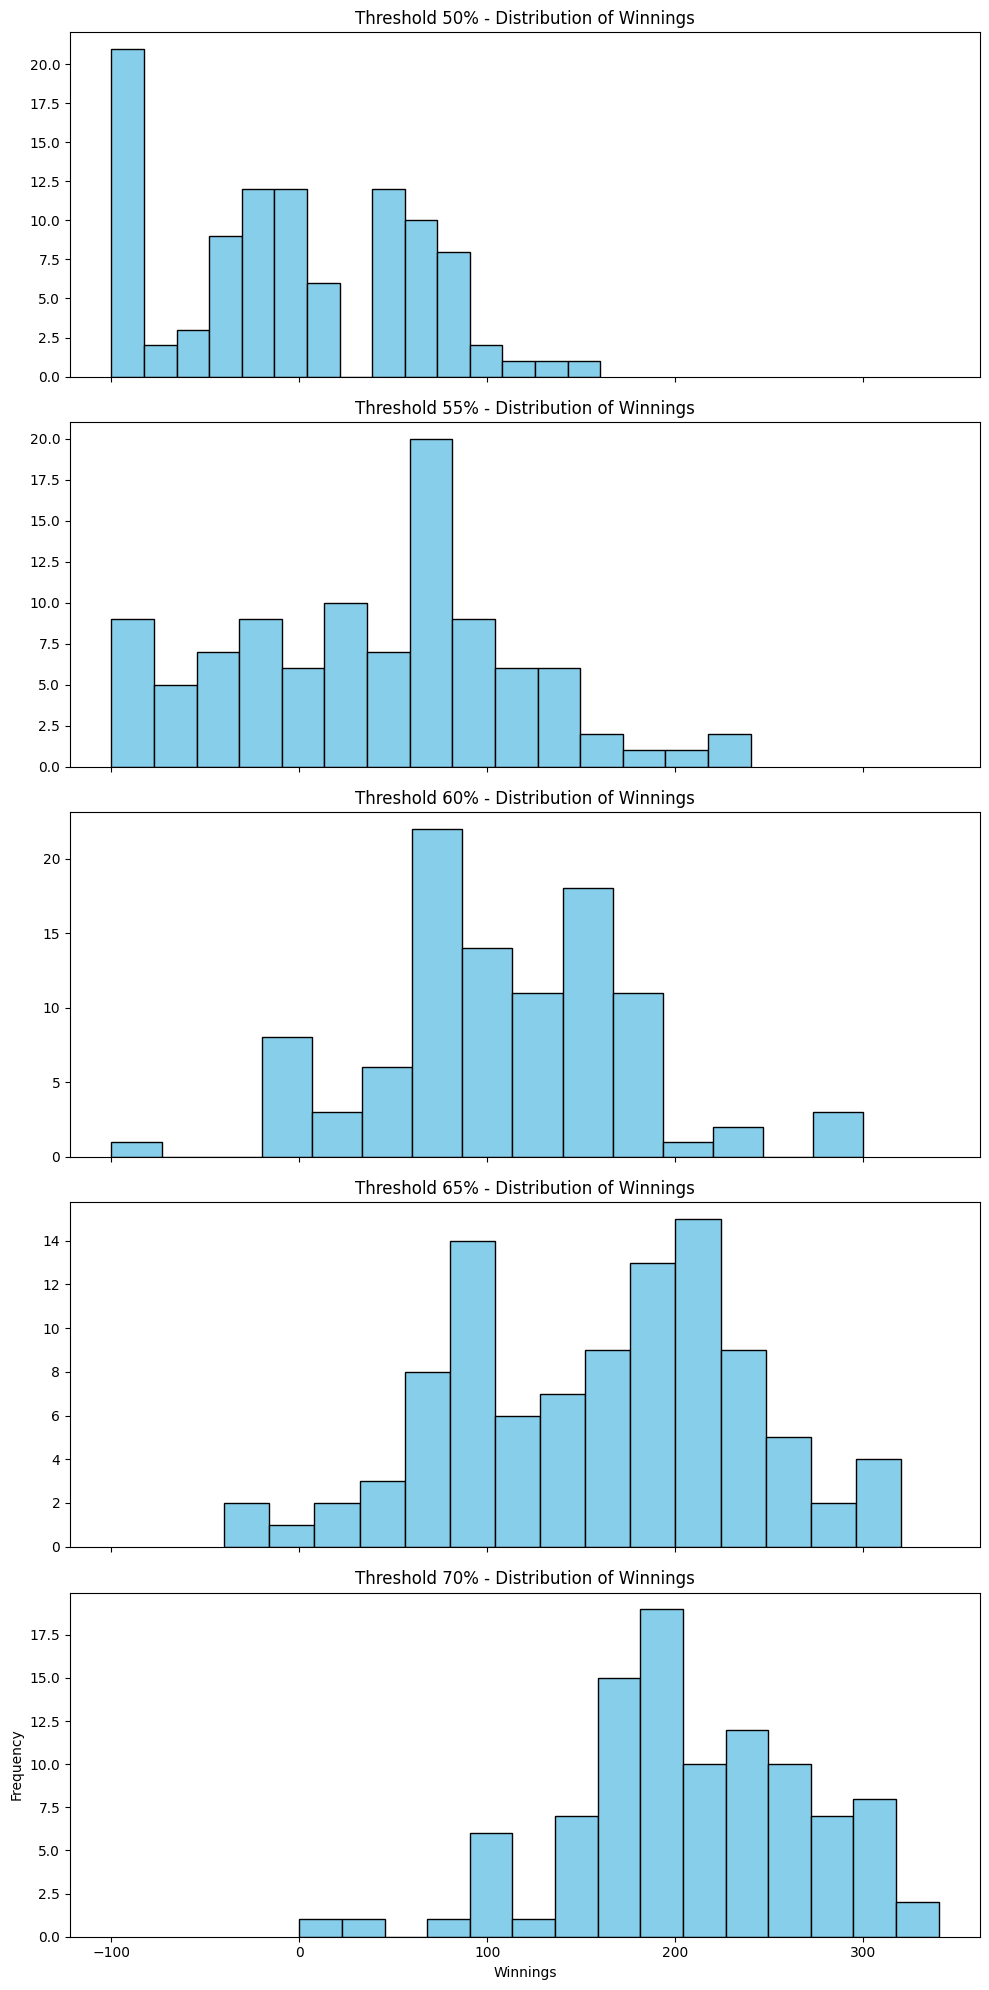

In [10]:

class Player:
    def __init__(self, chips, win_probability):
        self.chips = chips
        self.win_probability = win_probability

    def bet(self):
        return 10 if self.chips >= 10 else self.chips

    def play_turn(self):
        return random.choices([1, -1], weights=[self.win_probability, 100 - self.win_probability], k=1)[0]

def simulate_game(win_probability, rounds=50, initial_chips=100):
    strategy_player = Player(chips=initial_chips, win_probability=win_probability)
    dealer = Player(chips=initial_chips, win_probability=50)  # Dealer has a fixed 50% win rate
    players = [strategy_player, dealer] + [Player(chips=initial_chips, win_probability=50) for _ in range(2)]

    for _ in range(rounds):
        if strategy_player.chips <= 0:
            break
        for player in players:
            bet_amount = player.bet()
            result = player.play_turn()
            player.chips += bet_amount * result

    return strategy_player.chips - initial_chips  

thresholds = [50, 55, 60, 65, 70]
games = 100
rounds_per_game = 50
initial_chips = 100

results = {}

for threshold in thresholds:
    winnings = [simulate_game(win_probability=threshold, rounds=rounds_per_game, initial_chips=initial_chips) for _ in range(games)]
    avg_winnings = np.mean(winnings)
    std_dev_winnings = np.std(winnings)
    probability_winning = sum(1 for win in winnings if win > 0) / games
    results[threshold] = {
        "Average Winnings": avg_winnings,
        "Standard Deviation": std_dev_winnings,
        "Probability Winning": probability_winning,
    }


for threshold, stats in results.items():
    print(f"Threshold: {threshold}%")
    print(f"  Average Winnings: {stats['Average Winnings']}")
    print(f"  Standard Deviation: {stats['Standard Deviation']}")
    print(f"  Probability of Net Winning: {stats['Probability Winning']}\n")

fig, axs = plt.subplots(len(thresholds), 1, figsize=(10, 20), sharex=True)
for i, threshold in enumerate(thresholds):
    winnings = [simulate_game(win_probability=threshold, rounds=rounds_per_game, initial_chips=initial_chips) for _ in range(games)]
    axs[i].hist(winnings, bins=15, color='skyblue', edgecolor='black')
    axs[i].set_title(f"Threshold {threshold}% - Distribution of Winnings")

plt.xlabel("Winnings")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.